<a href="https://colab.research.google.com/github/hyu623/week4trial/blob/main/Week_3_Workalong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 3 - Text Analysis & Working with Text Files

(Be sure to copy to drive)

Text data is a bit different from numeric data. We can easily find the average of a series of numbers and things like the highest and lowest values in a range to get some ideas on what we are dealing with. We can't really do that with text. We'll focus on some tools that you can use to actually analyze text. We'll start with a library called [TextBlob](https://textblob.readthedocs.io/en/dev/).

In [ ]:
#Load up our libraries
from textblob import TextBlob
from google.colab import drive

#these should look familar
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests

#Some extra libraries we'll need for text analysis
import nltk
nltk.download('punkt')
nltk.download('brown')
nltk.download('punkt_tab')


#Connect to Gdrive
drive.mount('/content/gdrive')

print("Libraries and Drive Ready!")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Mounted at /content/gdrive
Libraries and Drive Ready!


# A text dataset

We are going to use a digial humanities example to explore some things that are possible. We'll begin with a diary from a young girl from the year 1900. Her name is Winnie Beam. Her [diary](http://hdl.handle.net/10464/7282) has been digitized, as well as turned into [data](https://docs.google.com/spreadsheets/d/17FO_a6jcLgycwDd7uYsrpPqcIterjquY2UyC7QAZmWs/edit?usp=sharing).

We are going to read in a CSV version of the data and put it into a dataframe.

In [ ]:
#Run this cell to load up our 'corpus'

winnie_corpus = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQcj2YkYKMn3HZo-5yfKw65kVENg_RZLRTrBxvJeRPB46k0z_BqIUD5ecuoyEmEGuCJ79ZyP-8rGeIv/pub?gid=0&single=true&output=csv', header = None)
winnie_corpus.columns = ["page","date","entry"]
winnie_corpus['date'] = pd.to_datetime(winnie_corpus['date'])
winnie_corpus['entry'] = winnie_corpus.entry.astype(str)

#preview our top entries
winnie_corpus.head()

,page,date,entry
0,7,1900-01-01,New Year. First day of 1900 Charlie Merritt di...
1,7,1900-01-02,Went uptown in afternoon. Was up to Eckardt's ...
2,8,1900-01-03,Mrs Trusty was here washing School started to-...
3,8,1900-01-04,Went over to Carman's to have Ella go with me ...
4,9,1900-01-05,"Sweep day. I read ""At the Camerons"" in the ""Ha..."


# Sentiment Analysis


We can analyze the _sentiment_ of the text (more [details](https://planspace.org/20150607-textblob_sentiment/).) The next cell demonstrates this:

In [ ]:
happy_sentence = "Python is the best programming language ever!"
sad_sentence = "Python is difficult to use, and very frustrating"


print("Sentiment of happy sentence ", TextBlob(happy_sentence).sentiment)
print("Sentiment of sad sentence ", TextBlob(sad_sentence).sentiment)

# polarity ranges from -1 to 1.
# subjectvity ranges from 0 to 1.


Sentiment of happy sentence  Sentiment(polarity=1.0, subjectivity=0.3)
Sentiment of sad sentence  Sentiment(polarity=-0.51, subjectivity=1.0)


**Q1**  Try a couple of different sentences in the code cell below. See if you can create something that scores -1 and another that scores 1 for polarity. See if you can minimize the subjectivity of your sentence.
(We can create a multi line string of text by putting it in triple quotes like the cell following.)


In [ ]:
test_text = "Python is very difficult to learn."

# Will this be a happy sentence or a sad one? Only TextBlob will tell!

print("Score of test sentence is ", TextBlob(test_text).sentiment)

Score of test sentence is  Sentiment(polarity=-0.65, subjectivity=1.0)


# Adding Sentiment to our Diary entries

This next cell will score each diary entry in a new column that will be added to the dataframe. We loop through each entry, calculate the two scores that represent the sentiment. After all the scores are computed we will add them to the dataframe.

In [ ]:
#Apply sentiment analysis from TextBlob

polarity = []
subjectivity = []


for day in winnie_corpus.entry:
    score = TextBlob(day)
    polarity.append(score.sentiment.polarity)
    subjectivity.append(score.sentiment.subjectivity)

winnie_corpus['polarity'] = polarity
winnie_corpus['subjectivity'] = subjectivity


#Let's look at our new top entries
winnie_corpus.head()

,page,date,entry,polarity,subjectivity
0,7,1900-01-01,New Year. First day of 1900 Charlie Merritt di...,0.205322,0.377286
1,7,1900-01-02,Went uptown in afternoon. Was up to Eckardt's ...,-0.020000,0.120000
2,8,1900-01-03,Mrs Trusty was here washing School started to-...,0.136364,0.454545
3,8,1900-01-04,Went over to Carman's to have Ella go with me ...,0.054583,0.384167
4,9,1900-01-05,"Sweep day. I read ""At the Camerons"" in the ""Ha...",0.030357,0.345714



# Entries

We can now see that scoring has been added. Run the next cell a few times to see different random entries.

In [ ]:
winnie_corpus.sample(5)

,page,date,entry,polarity,subjectivity
173,94,1900-06-25,Mamma went out collecting in afternoon. Very w...,0.780000,0.780000
5,9,1900-01-06,Took my music lesson. Mr Read had not had his ...,0.153788,0.484848
79,46,1900-03-21,Mamma went to church this afternoon. Ella came...,-0.193750,0.450000
212,114,1900-08-03,Mamma has a sore side to-day. I went uptown. T...,0.073611,0.297222
99,57,1900-04-12,Went over to Lee's in morning looks like rain....,0.200000,0.285417


# Now what?

We can do many things with the new data. For now lets just draw a line graph showing the changes in _polarity_ in her dairy entries.

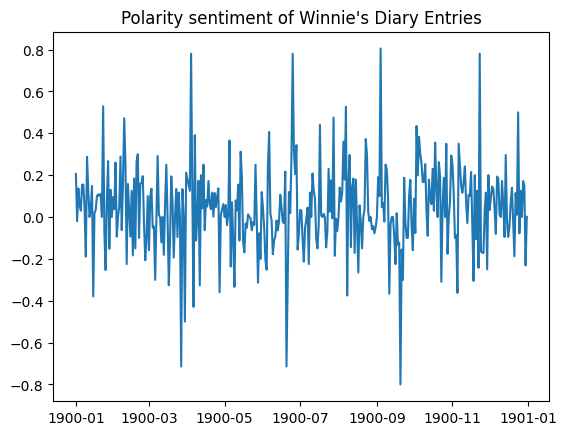

In [ ]:
#Let's graph out the sentiment as it changes day to day.

plt.plot(winnie_corpus["date"],winnie_corpus["polarity"])
plt.title("Polarity sentiment of Winnie's Diary Entries")
plt.show()

**Q2** Modify the following code cell to create a line graph of the _subjectivity_ of her diary entries for the year.

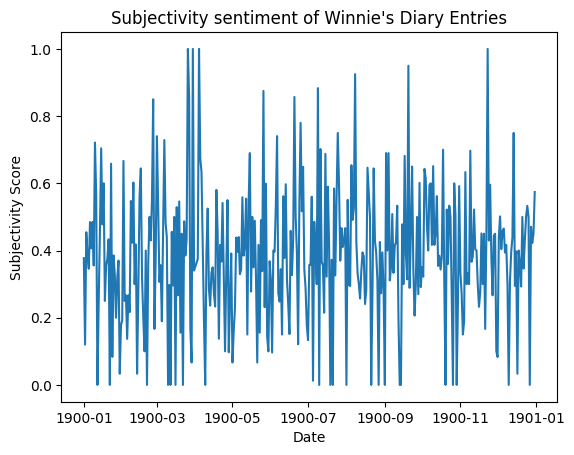

In [ ]:
plt.plot(winnie_corpus["date"],winnie_corpus["subjectivity"])
plt.title("Subjectivity sentiment of Winnie's Diary Entries")
plt.ylabel("Subjectivity Score")
plt.xlabel("Date")
plt.show()


# Closer look?

Let's take a closer look at the really high _polarity_ sentiment entries to see what is going on.

In [ ]:
#Top Five
winnie_corpus.sort_values(by = 'polarity', ascending = False).head(5)

,page,date,entry,polarity,subjectivity
244,130,1900-09-04,"Was reading ""Three men on Wheels"" when Mrs Tul...",0.805000,0.690000
324,170,1900-11-23,This morning I went uptown after my pins and t...,0.780000,1.000000
91,53,1900-04-04,I sent for some pictures on Friday from Beverl...,0.780000,1.000000
173,94,1900-06-25,Mamma went out collecting in afternoon. Very w...,0.780000,0.780000
22,18,1900-01-23,Went to school in the afternoon. Then papa mam...,0.529167,0.658333


Let's take a closer look at the really low _polarity_ sentiment entries to see what is going on.

In [ ]:
#Top Five
winnie_corpus.sort_values(by = 'polarity', ascending = True).head(5)

,page,date,entry,polarity,subjectivity
260,138,1900-09-20,Nasty gloomy day. Mr McSloy sent papa five tro...,-0.800000,0.950000
85,49,1900-03-27,Mamma was out collecting in afternoon at Mrs C...,-0.714286,0.857143
168,92,1900-06-20,Wash day. Mrs. Trusty has been sick and Dr. Jo...,-0.714286,0.857143
88,51,1900-03-30,Carrie is seriously ill in Santa Barbara. Mr G...,-0.500000,1.000000
93,54,1900-04-06,Sweep day. In the afternoon I practiced. Papa ...,-0.429167,0.633333


**Q3** Do you agree with the polarity scores that TextBlob assigns to these diary entries? Why or what not? Feel free to add some notes into the following text cell

I think that the sentiment scoring is... I am wondering what the mechanics is behind to caculate the scores. Maybe they are based on the frequency of appeared words labeled in a dictionary.

# Noun Phrases


We can get a good idea about what a corpus is about by looking at the different nouns that show up in it. Nouns that show up a lot give us an idea of the contents of the text. Textblob can do this for us. Run the cell below a few times to grab random entries in the data and to see what noun phrases they use.

In [ ]:
#We need a library to get Python to do stuff with Random values
import random
random_entry_number = random.randint(0,len(winnie_corpus))

#We finally pick a random entry here
bit_of_corpus = TextBlob(winnie_corpus["entry"][random_entry_number])

print("page:",winnie_corpus.iloc[random_entry_number]['page'])
print("date: ", winnie_corpus.iloc[random_entry_number]['date'])
print("entry: \n", winnie_corpus.iloc[random_entry_number]['entry'])

print("---")
print("Noun Phrases found")
print("---")
for np in bit_of_corpus.noun_phrases:
    print(np)

page: 154
date:  1900-10-22 00:00:00
entry: 
 Very warm. Mamma cleaned their bedroom. We went for a drive in the afternoon. Drove up to Mrs Sullivan's. She measured me for my green skirt. It is to be 41 inches in front & 42 in back. Went to office after balm and some certificates of papa's. He went to Falls on 7 o'clock trolley to get his license. Saw Mrs Pay.
---
Noun Phrases found
---
mamma
drove
sullivan
green skirt
went
papa 's
saw
pay


**Q4** What do you think about the Noun Phrase identification? Is it useful or not?



I think Noun Phrase is useful to some extent, but needs to be analyzed and interpreted in the context.

# Noun Phrases for the Diary

Now let's generate the noun phrases for January's entries

In [ ]:
#we use some pandas work to just grab the January entries
#stretch back into your memory to think about conditionals again
jan_corpus = winnie_corpus[(winnie_corpus['date'] >= '1900-01-01') & (winnie_corpus['date'] <= '1900-01-31')]

jan_phrases = dict()

for entry in jan_corpus.entry:

    tb = TextBlob(entry)
    #we create a dictionary that will hold the noun phrases
    #if it is the first time we see this np we put it in the dictionary
    #if not, we must have a count already, so we increase that by one
    for np in tb.noun_phrases:
        if np in jan_phrases:
            jan_phrases[np] += 1
        else:
            jan_phrases[np] = 1

#Print the top 10 things she mentioned in January

for np in sorted(jan_phrases, key=jan_phrases.get, reverse=True)[0:10]:
    print(np, jan_phrases[np])



went 23
mamma 19
papa 16
beatrice 8
took 8
trusty 5
music lesson 4
mr read 4
annie gardiner 4
got 4


**Q5** Modify the next series of cells to generate noun phrases for the next 5 months of the year.

In [ ]:
#February Entries
feb_corpus = winnie_corpus[(winnie_corpus['date'] >= '1900-02-01') & (winnie_corpus['date'] <= '1900-02-28')]

feb_phrases = dict()

for entry in feb_corpus.entry:
    tb = TextBlob(entry)
    for np in tb.noun_phrases:
        if np in feb_phrases:
            feb_phrases[np] += 1
        else:
            feb_phrases[np] = 1

#Print the top 10 things she mentioned in February

for np in sorted(feb_phrases, key=feb_phrases.get, reverse=True)[0:10]:
    print(np, feb_phrases[np])

mamma 20
went 18
papa 12
beatrice 7
pay 6
was 5
took 5
got 5
music lesson 4
musical 4


In [ ]:
#March Entries
mar_corpus = winnie_corpus[(winnie_corpus['date'] >= '1900-03-01') & (winnie_corpus['date'] <= '1900-03-31')]


mar_phrases = dict()

for entry in mar_corpus.entry:
    tb = TextBlob(entry)
    for np in tb.noun_phrases:
        if np in mar_phrases:
            mar_phrases[np] += 1
        else:
            mar_phrases[np] = 1

#Print the top 10 things she mentioned in March

for np in sorted(mar_phrases, key=mar_phrases.get, reverse=True)[0:10]:
    print(np, mar_phrases[np])

mamma 21
took 9
papa 9
went 8
got 7
pay 7
dwyer 7
mr perry 6
godard 5
beatrice 5


In [ ]:
#April Entries
april_corpus = winnie_corpus[(winnie_corpus['date'] >= '1900-04-01') & (winnie_corpus['date'] <= '1900-04-30')]

april_phrases = dict()

for entry in april_corpus.entry:
    tb = TextBlob(entry)
    for np in tb.noun_phrases:
        if np in april_phrases:
            april_phrases[np] += 1
        else:
            april_phrases[np] = 1

#Print the top 10 things she mentioned in April

for np in sorted(april_phrases, key=april_phrases.get, reverse=True)[0:10]:
    print(np, april_phrases[np])

mamma 24
papa 20
went 11
got 9
pay 8
took 7
beatrice 7
sullivan 7
christ 6
lizzie 5


In [ ]:
#May Entries
may_corpus = winnie_corpus[(winnie_corpus['date'] >= '1900-05-01') & (winnie_corpus['date'] <= '1900-05-31')]

may_phrases = dict()

for entry in may_corpus.entry:
    tb = TextBlob(entry)
    for np in tb.noun_phrases:
        if np in may_phrases:
            may_phrases[np] += 1
        else:
            may_phrases[np] = 1

#Print the top 10 things she mentioned in may

for np in sorted(may_phrases, key=may_phrases.get, reverse=True)[0:10]:
    print(np, may_phrases[np])

mamma 30
papa 21
went 17
got 11
ella 7
lizzie 6
rode 5
helen 5
pay 4
dwyer 4


In [ ]:
#June Entries
june_corpus = winnie_corpus[(winnie_corpus['date'] >= '1900-06-01') & (winnie_corpus['date'] <= '1900-06-30')]

june_phrases = dict()

for entry in june_corpus.entry:
    tb = TextBlob(entry)
    for np in tb.noun_phrases:
        if np in june_phrases:
            june_phrases[np] += 1
        else:
            june_phrases[np] = 1

#Print the top 10 things she mentioned in june

for np in sorted(june_phrases, key=june_phrases.get, reverse=True)[0:10]:
    print(np, june_phrases[np])

mamma 21
papa 16
got 13
went 13
took 7
lizzie 7
was 4
mrs. sullivan 4
ella 4
aunt lillie 4


# Changes in topic


**Q6**
Take a moment to look at what is printed for each month. Can you get a sense of what Winnie is writing about over the months? Or how those topics change?

What I can tell from looking at Noun Phrases in the diary is Mamma and papa are always the focus of her diary.

# Text and Text Files

Our week 2 & week 3 warmup material introduced some ideas about working with files in Google Drive and in our Colab environment. Since we are dealing with text analysis right now we'll take a moment to talk about text files as well.

Sometimes we want to take a string variable and write it to a file so that we can use it a later time.

We'll also make use of automatically grabbing content from the web using the [requests](https://pypi.org/project/requests/) library just like we did in week 1. We are going to grab a book from the [Project Guttenberg](https://www.gutenberg.org/) site as our example.

This is technically an example of screen scrapping. IE. we are programmatically grabbing content from the web using an automated tool. This is the type of thing that AI bots are doing and arguably it is [ruining](https://library.unc.edu/news/library-it-vs-the-ai-bots/) the web.

In [ ]:
#We'll be using the H.G. Wells book - The Invisible Man (https://www.gutenberg.org/ebooks/5230)
#but we'll focus on the plain text version
book_text_url = "https://www.gutenberg.org/cache/epub/5230/pg5230.txt"

response = requests.get(book_text_url)

In [ ]:
#we now have a string variable (response.text) which holds the whole text of the book
response.text

'\ufeffThe Project Gutenberg eBook of The Invisible Man: A Grotesque Romance\r\n    \r\nThis ebook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this ebook or online\r\nat www.gutenberg.org. If you are not located in the United States,\r\nyou will have to check the laws of the country where you are located\r\nbefore using this eBook.\r\n\r\nTitle: The Invisible Man: A Grotesque Romance\r\n\r\nAuthor: H. G. Wells\r\n\r\nRelease date: March 1, 2004 [eBook #5230]\r\n                Most recently updated: October 16, 2021\r\n\r\nLanguage: English\r\n\r\nCredits: Andrew Sly\r\n\r\n\r\n*** START OF THE PROJECT GUTENBERG EBOOK THE INVISIBLE MAN: A GROTESQUE ROMANCE ***\r\n\r\n[Illustration]\r\n\r\n\r\n\r\n\r\nThe Invisible Man\r\n\r\nA Grotesque Romance\r\n\r\nby H. G. Wells\r\n\r\n\

In [ ]:
#File I/O in Python is a whole week of content on its own
#but quickly, the 'w' means we are writing to the file
with (open('invisible_man.txt', 'w')) as f:
    f.write(response.text)

In [ ]:
#Magic command to display contents of folder
!ls -l

total 308
drwx------ 6 root root   4096 Feb 15 14:45 gdrive
-rw-r--r-- 1 root root 306429 Feb 15 14:46 invisible_man.txt
drwxr-xr-x 1 root root   4096 Jan 16 14:24 sample_data



# File I/O? More to go!

I'll encourage you to look up more tutorials with working with files in Python to get a full sense of what is possible.

Check out your drive through the [web](https://drive.google.com/), navigate to your `LibraryJuicePython` folder and have a look at what is there now.


# One final activity: Automatic Keyword Generator

Let's put all of what we have learned together to create an automatic keyword generator that identifies Noun Phrases in a book from Guttenberg.

We are going to be looking at the book [The Prince](https://en.wikipedia.org/wiki/The_Prince)


In [ ]:
keywords = dict()

# We are using The Prince - https://www.gutenberg.org/ebooks/1232
book_url = "https://www.gutenberg.org/files/1232/1232-0.txt"
book_title = "The Prince"


print("Downloading book...")
book = requests.get(book_url)

#save a copy of the downloaded book as a text file
with (open(book_title+'.txt', 'w')) as f:
    f.write(book.text)

#Turn text into text blob
book_blob = TextBlob(book.text)


print("Identiying Noun phrases and building frequency dictionary...")

#Go through all noun phrases
for np in book_blob.noun_phrases:
    if np in keywords:
        keywords[np] += 1
    else:
        keywords[np] = 1

noun_phrases = ""
#Sort dictionary and print top 20 entries
print("Most common Nouns...")

for np in sorted(keywords, key=keywords.get, reverse=True)[0:20]:
    noun_phrases += np + ","+str(keywords[np])+"\n"
    print(np, keywords[np])

with(open(book_title+'_keywords.txt','w')) as f:
    f.write(noun_phrases)

Identiying Noun phrases and building frequency dictionary...
Most common Nouns...
castruccio 135
florentines 61
italy 56
machiavelli 52
florence 48
lucca 47
france 44
pisa 36
rome 32
alexander 32
venetians 24
orsini 24
pistoia 23
milan 22
uguccione 22
prince_ 21
oliverotto 21
sinigalia 21
medici 20
god 19


In [ ]:
#Let's look again at what is in our folder
!ls

 gdrive		     sample_data	       'The Prince.txt'
 invisible_man.txt  'The Prince_keywords.txt'


In [ ]:
#Let's move all of the files we created for this exercise to our usual folder
!mv *.txt /content/gdrive/MyDrive/LibraryJuicePython

**Q7** Trying running the automatic keyword generator on a different book from Guttenberg. Perhaps something you have already read. Do you think it gives you a good idea of what the thing is about?


You will need to change the values for `book_url` and `book_title` in line 4 & 5.

In [ ]:
keywords = dict()

# We are using 隨園詩話 - https://www.gutenberg.org/ebooks/52206
book_url = "https://www.gutenberg.org/cache/epub/52206/pg52206.txt"
book_title = "隨園詩話"


print("Downloading book...")
book = requests.get(book_url)

#save a copy of the downloaded book as a text file
with (open(book_title+'.txt', 'w')) as f:
    f.write(book.text)

#Turn text into text blob
book_blob = TextBlob(book.text)


print("Identiying Noun phrases and building frequency dictionary...")

#Go through all noun phrases
for np in book_blob.noun_phrases:
    if np in keywords:
        keywords[np] += 1
    else:
        keywords[np] = 1

noun_phrases = ""
#Sort dictionary and print top 20 entries
print("Most common Nouns...")

for np in sorted(keywords, key=keywords.get, reverse=True)[0:20]:
    noun_phrases += np + ","+str(keywords[np])+"\n"
    print(np, keywords[np])

with(open(book_title+'_keywords.txt','w')) as f:
    f.write(noun_phrases)

Identiying Noun phrases and building frequency dictionary...
Most common Nouns...
project gutenberg™ 46
electronic works 15
project gutenberg 13
project gutenberg literary archive 12
electronic work 11
project gutenberg™ license 8
u.s. 7
copyright law 5
information 5
phrase “ 4
copyright holder 4
trademark license 3
free distribution 3
paragraph 1.f.3 3
restrictions whatsoever 2
project gutenberg license 2
title 2
author 2
隨園詩話 * * * 2
terms 2


In [ ]:
keywords = dict()

# We are using 狄公案 - https://www.gutenberg.org/ebooks/27686
book_url = "https://www.gutenberg.org/cache/epub/27686/pg27686.txt"
book_title = "狄公案"


print("Downloading book...")
book = requests.get(book_url)

#save a copy of the downloaded book as a text file
with (open(book_title+'.txt', 'w')) as f:
    f.write(book.text)

#Turn text into text blob
book_blob = TextBlob(book.text)


print("Identiying Noun phrases and building frequency dictionary...")

#Go through all noun phrases
for np in book_blob.noun_phrases:
    if np in keywords:
        keywords[np] += 1
    else:
        keywords[np] = 1

noun_phrases = ""
#Sort dictionary and print top 20 entries
print("Most common Nouns...")

for np in sorted(keywords, key=keywords.get, reverse=True)[0:20]:
    noun_phrases += np + ","+str(keywords[np])+"\n"
    print(np, keywords[np])

with(open(book_title+'_keywords.txt','w')) as f:
    f.write(noun_phrases)

Identiying Noun phrases and building frequency dictionary...
Most common Nouns...
project gutenberg™ 46
electronic works 15
project gutenberg 13
project gutenberg literary archive 12
electronic work 11
project gutenberg™ license 8
u.s. 7
copyright law 5
information 5
phrase “ 4
copyright holder 4
trademark license 3
free distribution 3
paragraph 1.f.3 3
restrictions whatsoever 2
project gutenberg license 2
january 2
terms 2
paragraph 1.e.8 2
full terms 2


In [ ]:
keywords = dict()

# We are using Der Struwwelpeter - https://www.gutenberg.org/ebooks/24571
book_url = "https://www.gutenberg.org/cache/epub/24571/pg24571.txt"
book_title = "Der Struwwelpeter"


print("Downloading book...")
book = requests.get(book_url)

#save a copy of the downloaded book as a text file
with (open(book_title+'.txt', 'w')) as f:
    f.write(book.text)

#Turn text into text blob
book_blob = TextBlob(book.text)


print("Identiying Noun phrases and building frequency dictionary...")

#Go through all noun phrases
for np in book_blob.noun_phrases:
    if np in keywords:
        keywords[np] += 1
    else:
        keywords[np] = 1

noun_phrases = ""
#Sort dictionary and print top 20 entries
print("Most common Nouns...")

for np in sorted(keywords, key=keywords.get, reverse=True)[0:20]:
    noun_phrases += np + ","+str(keywords[np])+"\n"
    print(np, keywords[np])

with(open(book_title+'_keywords.txt','w')) as f:
    f.write(noun_phrases)

Identiying Noun phrases and building frequency dictionary...
Most common Nouns...
project gutenberg™ 46
illustration 36
electronic works 15
project gutenberg 13
und 13
suppe 13
er 13
kind 12
ich 12
project gutenberg literary archive 12
electronic work 11
da 9
die geschichte 8
miau 8
mio 8
doch 8
project gutenberg™ license 8
und der 7
der 7
hund 7



# Moral of the story

Text analysis lets you do a bunch of different things. We have just scratched the surface here.